# Analysing and Predicting Employee Attrition Rate

### Overview

In this project, we imagine a scenario where a company has asked us to determine why its high performing employees are leaving, and what can be done to reduce the orgnasation's attrition rate. 

There are 2 goals to this project:
- Idenitify what factors are most associated with high-performing leavers.
- Predict which employees are most at risk of leaving based on their characteristics.

### Dataset

The dataset used for this project is the 'New_Interviewee_Case_Study_Dataset_FINAL__282_29.xlsx'. This dataset contains 1474 rows each corresponding to a unique employee. The datset contains 20 columns that correspond to different chracteristics of each employee, such as age, whether they work from home, their department.

## Reading in data and importing libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly
# import plotly.figure_factory as ff
# import plotly.plotly as py
# import plotly.graph_objs as go

plt.style.use('bmh')
# pd.set_option('max_columns', 200)

In [66]:
# read in excel file
df = pd.read_excel("New_Interviewee_Case_Study_Dataset_FINAL__282_29.xlsx")

# make first row the headers of dataset
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [67]:
df[['Over18', 'complaintresolved', 'Left']] = df[['Over18', 'complaintresolved', 'Left']] \
.replace({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0})

In [68]:
# changing column datatypes

df = df.astype({
    'Age':'int64', 
    'Gender': 'object', 
    'MonthlyIncome':'object', 
    'Department':'object' , 
    'NumCompaniesWorked':'int64',
    'Over18':'int64', 
    'workingfromhome':'int64', 
    'BusinessTravel': 'object', 
    'DistanceFromHome': 'int64',
    'StandardHours': 'int64', 
    'JobSatisfaction':'int64', 
    'complaintfiled':'int64',
    'complaintresolved':'object', 
    'complaintyears':'object', 
    'PercentSalaryHike':'int64',
    'PerformanceRating':'int64', 
    'TotalWorkingYears':'int64', 
    'YearsAtCompany':'int64',
    'YearsSinceLastPromotion':'int64', 
    'Left':'int64'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 1 to 1474
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1474 non-null   int64 
 1   Gender                   1474 non-null   object
 2   MonthlyIncome            1474 non-null   object
 3   Department               1474 non-null   object
 4   NumCompaniesWorked       1474 non-null   int64 
 5   Over18                   1474 non-null   int64 
 6   workingfromhome          1474 non-null   int64 
 7   BusinessTravel           1474 non-null   object
 8   DistanceFromHome         1474 non-null   int64 
 9   StandardHours            1474 non-null   int64 
 10  JobSatisfaction          1474 non-null   int64 
 11  complaintfiled           1474 non-null   int64 
 12  complaintresolved        294 non-null    object
 13  complaintyears           263 non-null    object
 14  PercentSalaryHike        1474 non-null  

In [69]:
# what are the raw numbers of leavers and what is the verall percentage of leavers?

percentage_leavers = round((sum(df['Left']) / 1474) * 100)
leavers_raw = round(len(df[df['Left'] == 1]))

print('{} employees left the company out of 1474 employees'.format(leavers_raw))
print('{} percent of employees left the company'.format(percentage_leavers))

241 employees left the company out of 1474 employees
16 percent of employees left the company


## EDA

In [70]:
# creating dataframe of just the leavers
leavers = df[df['Left'] == 1]
leavers.describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,241.000000,241.000000,241.0,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,33.792531,2.950207,1.0,0.493776,10.655602,40.0,2.489627,0.170124,15.070539,2.829876,8.365145,5.165975,1.966805,1.0
std,9.835655,2.692120,0.0,0.501002,8.493727,0.0,1.122171,0.376524,3.747110,1.449173,7.253122,5.923597,3.151544,0.0
min,18.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,28.000000,1.000000,1.0,0.000000,3.000000,40.0,1.000000,0.000000,12.000000,2.000000,3.000000,1.000000,0.000000,1.0
50%,32.000000,1.000000,1.0,0.000000,9.000000,40.0,3.000000,0.000000,14.000000,3.000000,7.000000,3.000000,1.000000,1.0
75%,39.000000,5.000000,1.0,1.000000,17.000000,40.0,3.000000,0.000000,17.000000,4.000000,10.000000,7.000000,2.000000,1.0
max,59.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.000000,40.000000,40.000000,15.000000,1.0


In [71]:
# creating df of just the current employees
current_employees = df[df['Left'] == 0]
current_employees.describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,1233.000000,1233.00000,1233.0,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0
mean,37.561233,2.64558,1.0,0.449311,8.915653,40.0,2.778589,0.205191,15.231144,2.879157,11.862936,7.369019,2.234388,0.0
std,8.888360,2.46009,0.0,0.497626,8.012633,0.0,1.093277,0.404005,3.639511,1.389605,7.760719,6.096298,3.234762,0.0
min,18.000000,0.00000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,1.00000,1.0,0.000000,2.000000,40.0,2.000000,0.000000,12.000000,2.000000,6.000000,3.000000,0.000000,0.0
50%,36.000000,2.00000,1.0,0.000000,7.000000,40.0,3.000000,0.000000,14.000000,3.000000,10.000000,6.000000,1.000000,0.0
75%,43.000000,4.00000,1.0,1.000000,13.000000,40.0,4.000000,0.000000,18.000000,4.000000,16.000000,10.000000,3.000000,0.0
max,60.000000,9.00000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.000000,38.000000,37.000000,15.000000,0.0


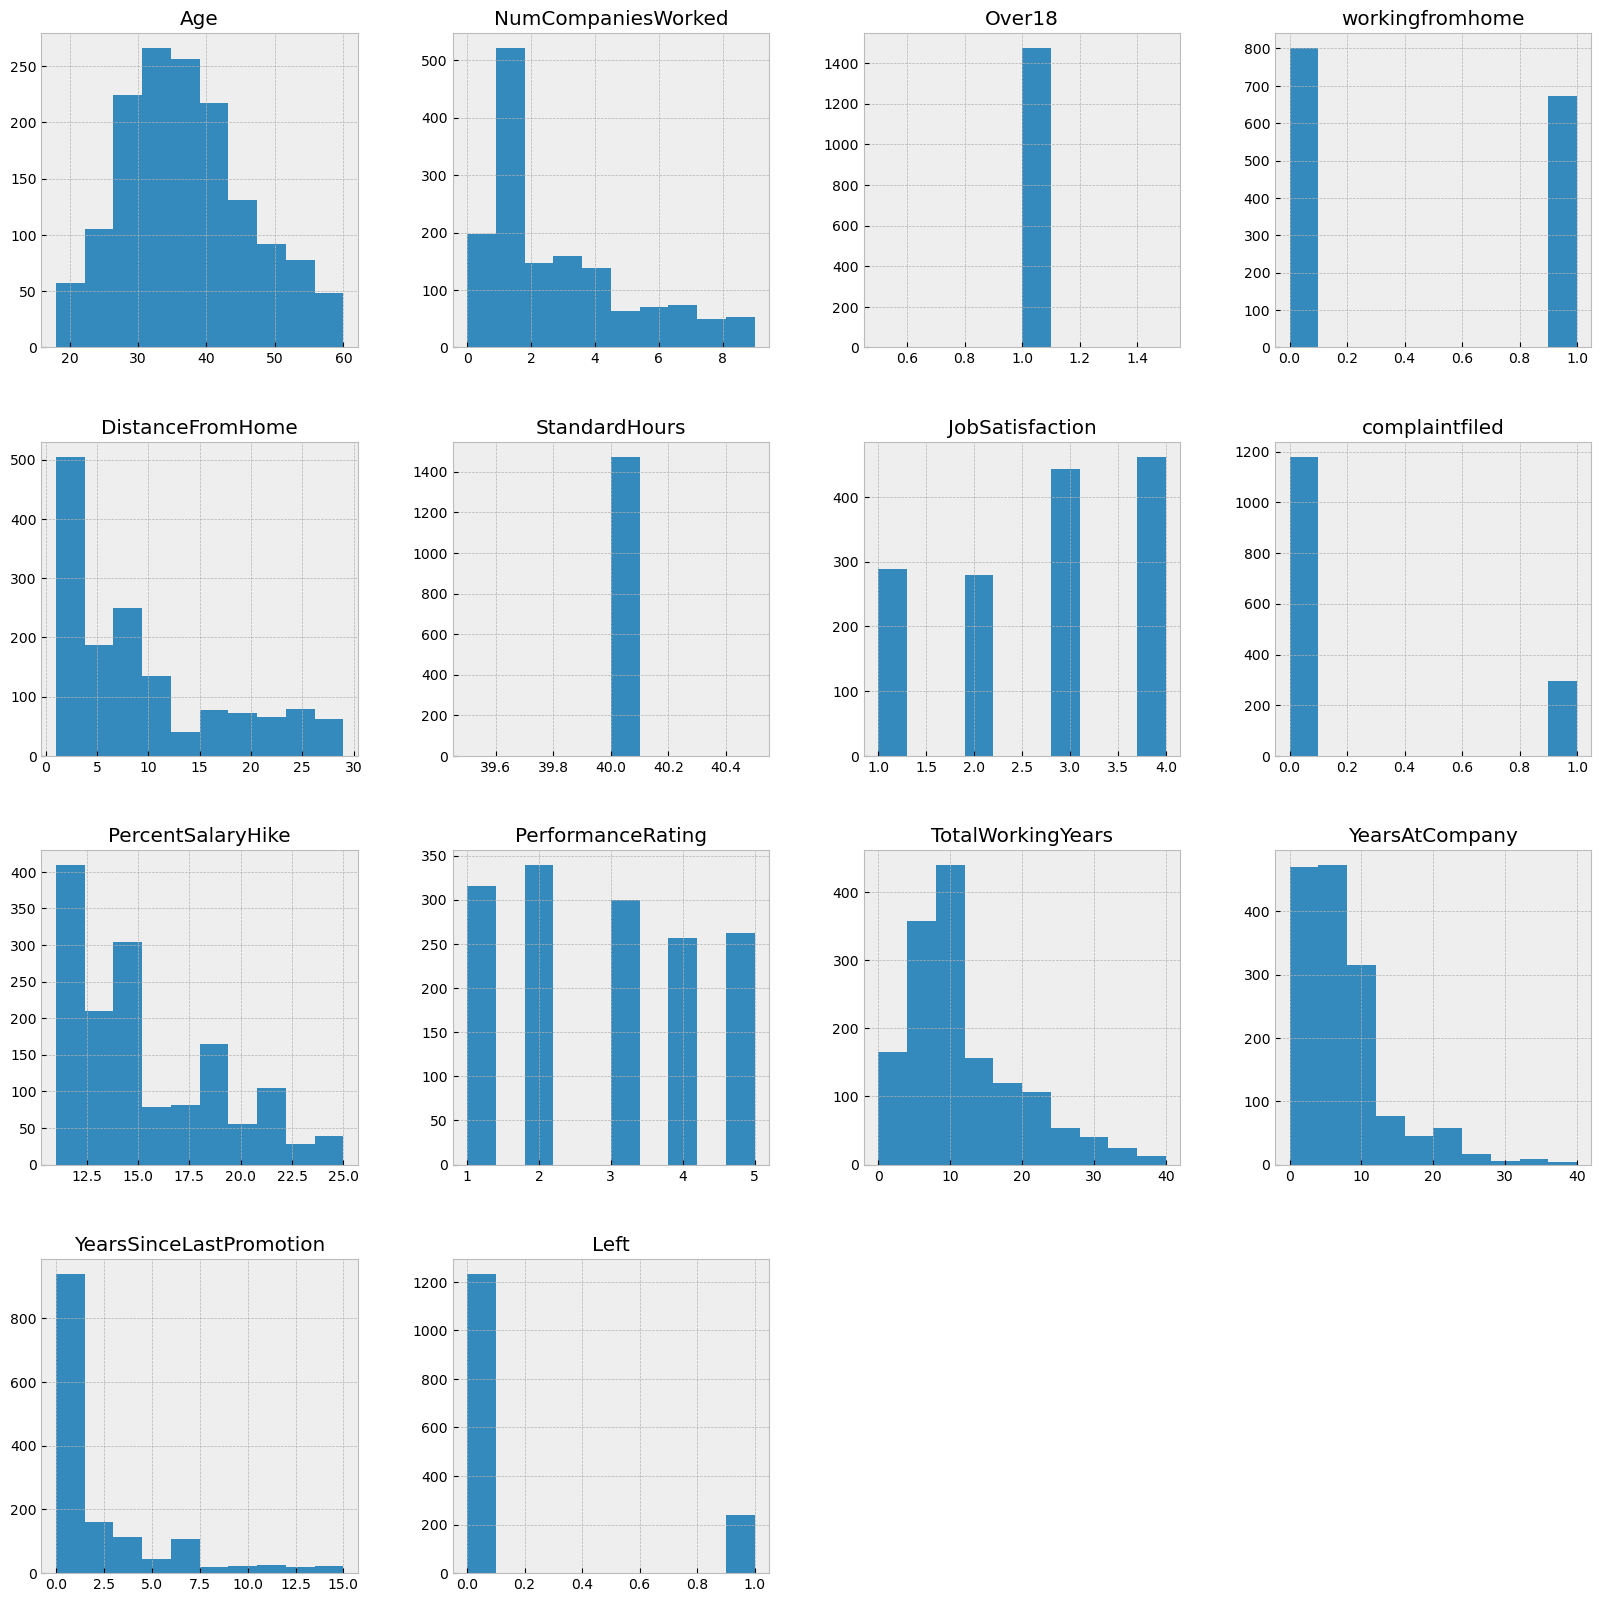

In [72]:
df.hist(figsize=(20,20))
plt.show()

### Performance Rating

Let's start doing some exploratory data analysis on each of the columns in the table and see what the employee leaving patterns are like for each one. Let's start with performance rating.

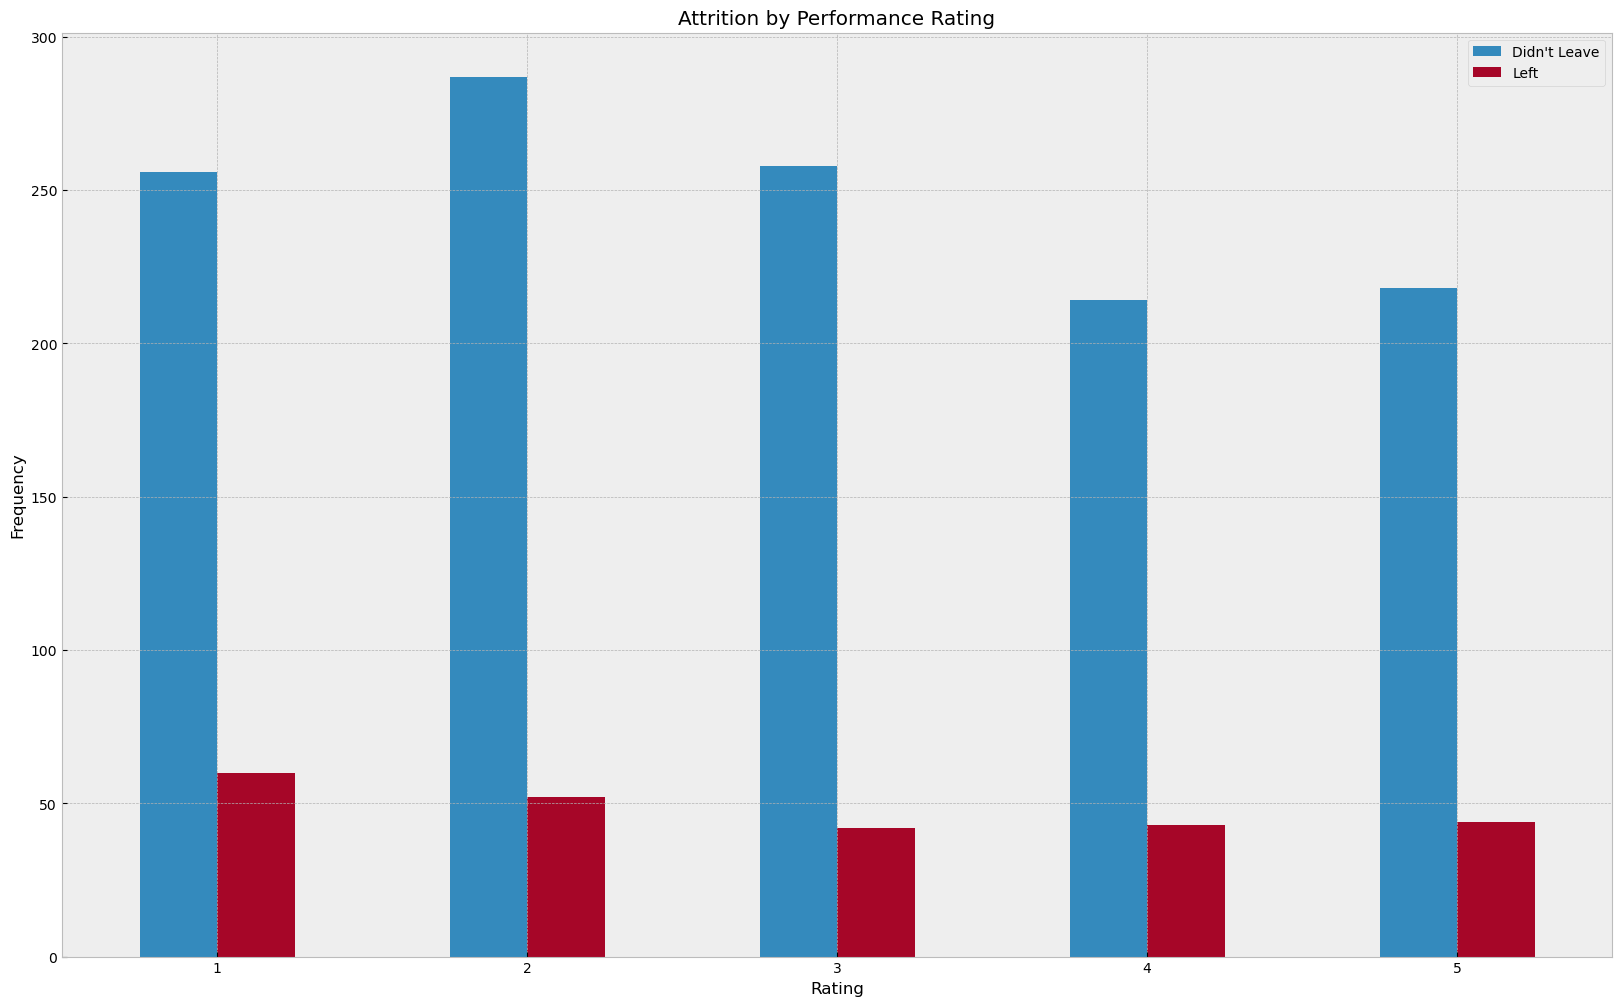

In [73]:
performance_df = df.pivot_table( \
                       index='PerformanceRating',
                       columns='Left',
                       aggfunc='size',
                       fill_value=0)

performance_df.plot(kind='bar', figsize=(20,12))

plt.xlabel('Rating')
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
plt.title('Attrition by Performance Rating')
plt.legend(["Didn't Leave", 'Left'], loc='upper right')
plt.show()

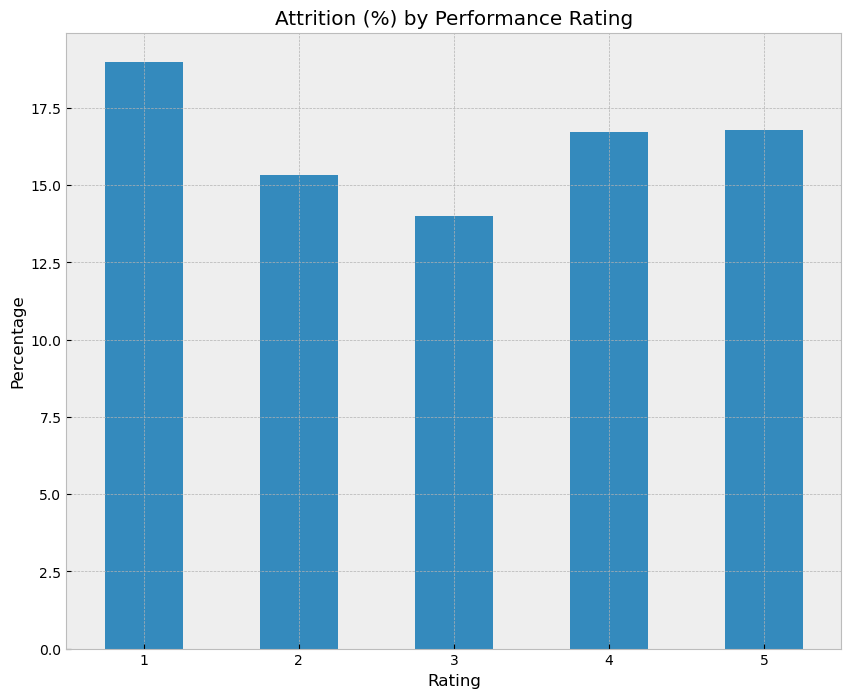

In [74]:
performance_df['percent_left'] = performance_df[1] / (performance_df[0] + performance_df[1]) * 100

performance_df['percent_left'].plot(kind='bar', figsize=(10,8))

plt.xlabel('Rating')
plt.xticks(rotation='horizontal')
plt.ylabel('Percentage')
plt.title('Attrition (%) by Performance Rating')
# plt.legend(["Didn't Leave", 'Left'], loc='upper right')
plt.show()

In [75]:
df.describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,1474.000000,1474.000000,1474.0,1474.000000,1474.000000,1474.0,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,36.945047,2.695387,1.0,0.456581,9.200136,40.0,2.731343,0.199457,15.204885,2.871099,11.291045,7.008820,2.190638,0.163501
std,9.153312,2.501083,0.0,0.498280,8.115843,0.0,1.102861,0.399728,3.656512,1.399134,7.785923,6.120918,3.221768,0.369947
min,18.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.0,0.000000,2.000000,40.0,2.000000,0.000000,12.000000,2.000000,6.000000,3.000000,0.000000,0.000000
50%,36.000000,2.000000,1.0,0.000000,7.000000,40.0,3.000000,0.000000,14.000000,3.000000,10.000000,5.000000,1.000000,0.000000
75%,43.000000,4.000000,1.0,1.000000,14.000000,40.0,4.000000,0.000000,18.000000,4.000000,15.000000,9.000000,3.000000,0.000000
max,60.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.000000,40.000000,40.000000,15.000000,1.000000


In [76]:
# rating high perfromers as those with a performance rating of 5 (the highest rating)
high_performers = df[df['PerformanceRating'] == 5]
high_performers.describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,262.000000,262.000000,262.0,262.000000,262.000000,262.0,262.000000,262.000000,262.000000,262.0,262.000000,262.000000,262.000000,262.000000
mean,37.095420,2.572519,1.0,0.496183,9.545802,40.0,2.725191,0.225191,21.374046,5.0,11.286260,6.935115,2.274809,0.167939
std,9.601767,2.419685,0.0,0.500942,8.632770,0.0,1.134978,0.418507,1.978179,0.0,7.825083,5.691930,3.394956,0.374527
min,19.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,12.000000,5.0,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.0,0.000000,2.000000,40.0,2.000000,0.000000,20.000000,5.0,6.000000,3.000000,0.000000,0.000000
50%,36.000000,1.000000,1.0,0.000000,7.000000,40.0,3.000000,0.000000,21.000000,5.0,10.000000,5.000000,1.000000,0.000000
75%,43.000000,4.000000,1.0,1.000000,15.000000,40.0,4.000000,0.000000,23.000000,5.0,14.750000,10.000000,3.000000,0.000000
max,60.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.0,37.000000,36.000000,15.000000,1.000000


In [77]:
high_performers[high_performers['Left'] == 1].describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,44.000000,44.000000,44.0,44.000000,44.000000,44.0,44.000000,44.000000,44.000000,44.0,44.000000,44.000000,44.000000,44.0
mean,33.772727,2.681818,1.0,0.477273,12.431818,40.0,2.250000,0.159091,21.068182,5.0,7.863636,4.500000,1.522727,1.0
std,10.293063,2.700325,0.0,0.505258,8.924484,0.0,1.203193,0.369989,2.872465,0.0,6.300945,4.111809,2.425529,0.0
min,19.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,12.000000,5.0,0.000000,0.000000,0.000000,1.0
25%,28.250000,1.000000,1.0,0.000000,4.750000,40.0,1.000000,0.000000,20.000000,5.0,2.750000,1.000000,0.000000,1.0
50%,33.000000,1.000000,1.0,0.000000,10.000000,40.0,2.000000,0.000000,22.000000,5.0,7.500000,3.000000,0.000000,1.0
75%,37.500000,4.000000,1.0,1.000000,21.000000,40.0,3.000000,0.000000,23.000000,5.0,11.000000,8.000000,2.000000,1.0
max,59.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.0,30.000000,15.000000,10.000000,1.0


In [78]:
leavers.describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,241.000000,241.000000,241.0,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,33.792531,2.950207,1.0,0.493776,10.655602,40.0,2.489627,0.170124,15.070539,2.829876,8.365145,5.165975,1.966805,1.0
std,9.835655,2.692120,0.0,0.501002,8.493727,0.0,1.122171,0.376524,3.747110,1.449173,7.253122,5.923597,3.151544,0.0
min,18.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,28.000000,1.000000,1.0,0.000000,3.000000,40.0,1.000000,0.000000,12.000000,2.000000,3.000000,1.000000,0.000000,1.0
50%,32.000000,1.000000,1.0,0.000000,9.000000,40.0,3.000000,0.000000,14.000000,3.000000,7.000000,3.000000,1.000000,1.0
75%,39.000000,5.000000,1.0,1.000000,17.000000,40.0,3.000000,0.000000,17.000000,4.000000,10.000000,7.000000,2.000000,1.0
max,59.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.000000,40.000000,40.000000,15.000000,1.0


In [79]:
len(high_performers.Left == 1)

262

### Income Level

In [80]:
high_performers.MonthlyIncome.value_counts()

medium    105
low        90
high       67
Name: MonthlyIncome, dtype: int64

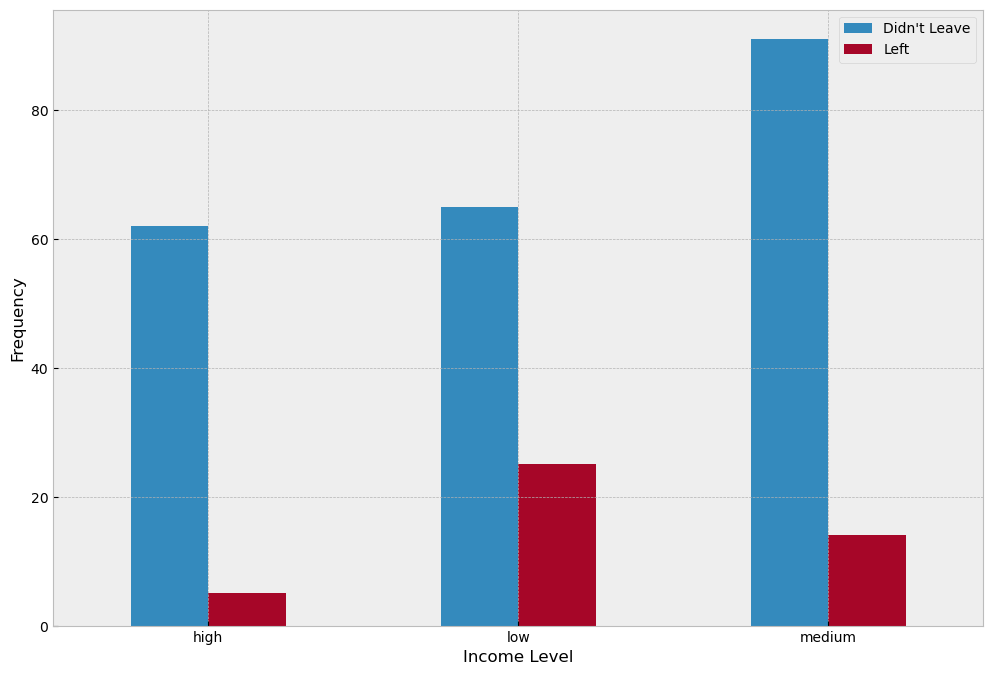

In [81]:
hp_income_df = high_performers.pivot_table( \
                       index='MonthlyIncome',
                       columns='Left',
                       aggfunc='size',
                       fill_value=0)
# hp_income_df.sort_values()
hp_income_df.plot(kind='bar', figsize=(12,8))

plt.xlabel('Income Level')
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
# plt.title('Attrition Status of High Performing Employees by Income Level')
plt.legend(["Didn't Leave", 'Left'], loc='upper right')
plt.show()

In [82]:
# print(len(high_performers[(high_performers['Left'] == 1) & (high_performers['MonthlyIncome'] == 'low')]))

percentage_li_hp_leavers = \
len(high_performers[(high_performers['Left'] == 1) & (high_performers['MonthlyIncome'] == 'low')]) \
/ len(high_performers[high_performers['MonthlyIncome'] == 'low']) \
*100

percentage_mi_hp_leavers = \
len(high_performers[(high_performers['Left'] == 1) & (high_performers['MonthlyIncome'] == 'medium')]) \
/ len(high_performers[high_performers['MonthlyIncome'] == 'low']) \
*100

percentage_hi_hp_leavers = \
len(high_performers[(high_performers['Left'] == 1) & (high_performers['MonthlyIncome'] == 'high')]) \
/ len(high_performers[high_performers['MonthlyIncome'] == 'low']) \
*100

print("The percentage of leavers with low incomes of high performers was {} percent compared to {} percent for those on medium incomes and {}  percent for those on high income." \
     .format(round(percentage_li_hp_leavers), round(percentage_mi_hp_leavers), round(percentage_hi_hp_leavers)))

The percentage of leavers with low incomes of high performers was 28 percent compared to 16 percent for those on medium incomes and 6  percent for those on high income.


In [83]:
df_hp_leavers = high_performers[high_performers['Left'] == 1]

num_hp_leavers = len(high_performers[high_performers['Left'] == 1])

num_li_hp_leavers = len(df_hp_leavers[df_hp_leavers['MonthlyIncome'] == 'low'])

print(num_li_hp_leavers)

print("Those on low income make up {} percent of high performing leavers".format(round((num_li_hp_leavers / num_hp_leavers) * 100)))

25
Those on low income make up 57 percent of high performing leavers


In [84]:
# Is that just because hp leavers tend to be working in departments of which the income is low?
# Or is it because the leavers on lower incomes haven't been working at the company long enough to have higher salary?

In [85]:
leavers[leavers['MonthlyIncome'] == 'low'].Department.value_counts()

Research & Development    86
Sales                     32
Human Resources           10
Name: Department, dtype: int64

In [86]:
df[df['MonthlyIncome'] == 'high'].describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,365.000000,365.000000,365.0,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,43.457534,3.205479,1.0,0.446575,9.342466,40.0,2.704110,0.189041,15.189041,2.857534,20.200000,11.605479,4.000000,0.106849
std,8.371293,2.546053,0.0,0.497820,8.381067,0.0,1.111928,0.392079,3.825865,1.428316,8.069479,8.559936,4.503967,0.309346
min,25.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,1.0,0.000000,2.000000,40.0,2.000000,0.000000,12.000000,2.000000,13.000000,5.000000,0.000000,0.000000
50%,43.000000,3.000000,1.0,0.000000,7.000000,40.0,3.000000,0.000000,14.000000,3.000000,21.000000,9.000000,2.000000,0.000000
75%,50.000000,5.000000,1.0,1.000000,14.000000,40.0,4.000000,0.000000,18.000000,4.000000,26.000000,18.000000,7.000000,0.000000
max,60.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.000000,40.000000,40.000000,15.000000,1.000000


In [87]:
df_hp_leavers[df_hp_leavers['MonthlyIncome'] == 'low'].describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,25.000000,25.000000,25.0,25.000000,25.0000,25.0,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.00000,25.0
mean,29.720000,2.560000,1.0,0.560000,11.0000,40.0,2.160000,0.200000,21.720000,5.0,4.360000,2.160000,0.52000,1.0
std,9.497895,2.662705,0.0,0.506623,8.3666,0.0,1.213809,0.408248,1.646208,0.0,4.508141,2.192411,0.87178,0.0
min,19.000000,0.000000,1.0,0.000000,1.0000,40.0,1.000000,0.000000,19.000000,5.0,0.000000,0.000000,0.00000,1.0
25%,22.000000,1.000000,1.0,0.000000,4.0000,40.0,1.000000,0.000000,20.000000,5.0,1.000000,1.000000,0.00000,1.0
50%,29.000000,1.000000,1.0,1.000000,9.0000,40.0,2.000000,0.000000,22.000000,5.0,3.000000,1.000000,0.00000,1.0
75%,34.000000,4.000000,1.0,1.000000,20.0000,40.0,3.000000,0.000000,23.000000,5.0,7.000000,3.000000,1.00000,1.0
max,58.000000,9.000000,1.0,1.000000,25.0000,40.0,4.000000,1.000000,25.000000,5.0,19.000000,9.000000,3.00000,1.0


In [88]:
df_hp_leavers[df_hp_leavers['MonthlyIncome'] != 'low'].describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,19.000000,19.000000,19.0,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.0
mean,39.105263,2.842105,1.0,0.368421,14.315789,40.0,2.368421,0.105263,20.210526,5.0,12.473684,7.578947,2.842105,1.0
std,8.943618,2.813917,0.0,0.495595,9.504693,0.0,1.211543,0.315302,3.838098,0.0,5.316311,4.045791,3.131616,0.0
min,29.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,12.000000,5.0,5.000000,0.000000,0.000000,1.0
25%,33.000000,1.000000,1.0,0.000000,6.000000,40.0,1.000000,0.000000,19.500000,5.0,10.000000,4.500000,0.000000,1.0
50%,35.000000,2.000000,1.0,0.000000,14.000000,40.0,2.000000,0.000000,22.000000,5.0,11.000000,8.000000,2.000000,1.0
75%,46.000000,3.500000,1.0,1.000000,22.500000,40.0,3.500000,0.000000,22.500000,5.0,13.500000,10.000000,5.000000,1.0
max,59.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,24.000000,5.0,30.000000,15.000000,10.000000,1.0


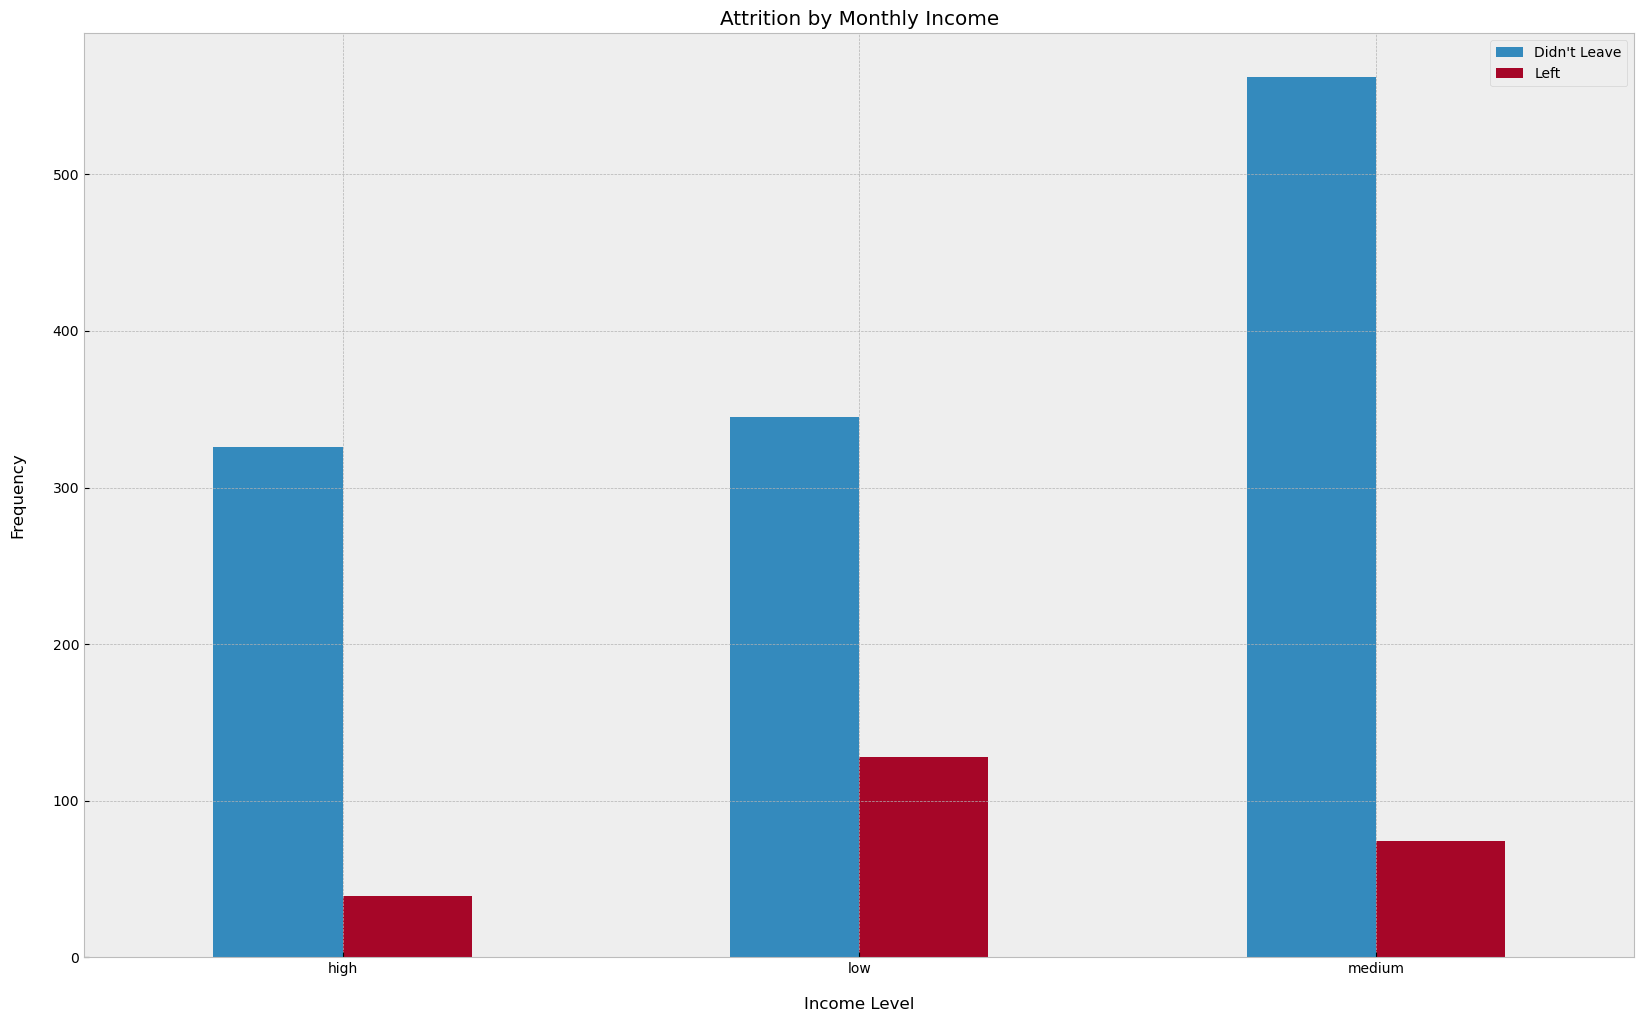

In [89]:
monthly_income_df = df.pivot_table( \
                       index='MonthlyIncome',
                       columns='Left',
                       aggfunc='size',
                       fill_value=0) \
.plot(kind='bar', figsize=(20,12))

plt.xlabel('Income Level', labelpad=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency', labelpad=20)
plt.title('Attrition by Monthly Income')
plt.legend(loc='upper right', labels=["Didn't Leave", 'Left'])
plt.show()

In [90]:
print("Those on low income make up 53 percent of leavers in general")

Those on low income make up 53 percent of leavers in general


### Age

C:\Users\johnm\AppData\Local\Temp\ipykernel_26396\2524703203.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


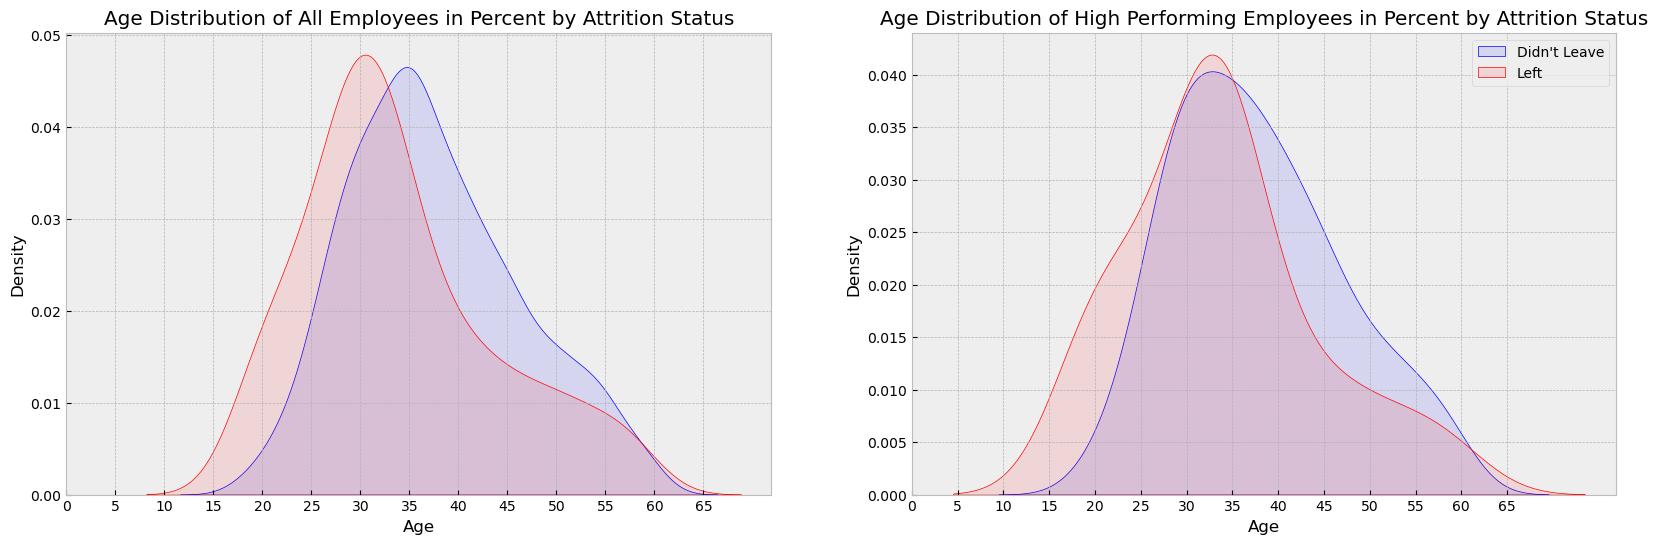

In [91]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.kdeplot(df.loc[df['Left'] == 0, 'Age'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[0])
sns.kdeplot(df.loc[df['Left'] == 1, 'Age'], fill=True, color='r', label="Left", alpha=.1, ax=ax[0])

sns.kdeplot(high_performers.loc[high_performers['Left'] == 0, 'Age'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[1])
sns.kdeplot(high_performers.loc[high_performers['Left'] == 1, 'Age'], fill=True, color='r', label="Left", alpha=.1, ax=ax[1])

plt.legend()
plt.setp(ax, xticks=range(0, 70, 5))
ax[0].set_title('Age Distribution of All Employees in Percent by Attrition Status')
ax[1].set_title('Age Distribution of High Performing Employees in Percent by Attrition Status')


fig.show()



In [92]:
# Employees between ages of 18 and 33 show a higher proportion of leavers compared to their counterparts
# For high performers, employees between ages of 18 and 26 show a higher proportion of leavers...
# but this remains more or less equal from ages of 26 to 35. Employees from the age of 35 show greater proportion of current employees than their counterparts.

### Total Working Years

C:\Users\johnm\AppData\Local\Temp\ipykernel_26396\1532881602.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


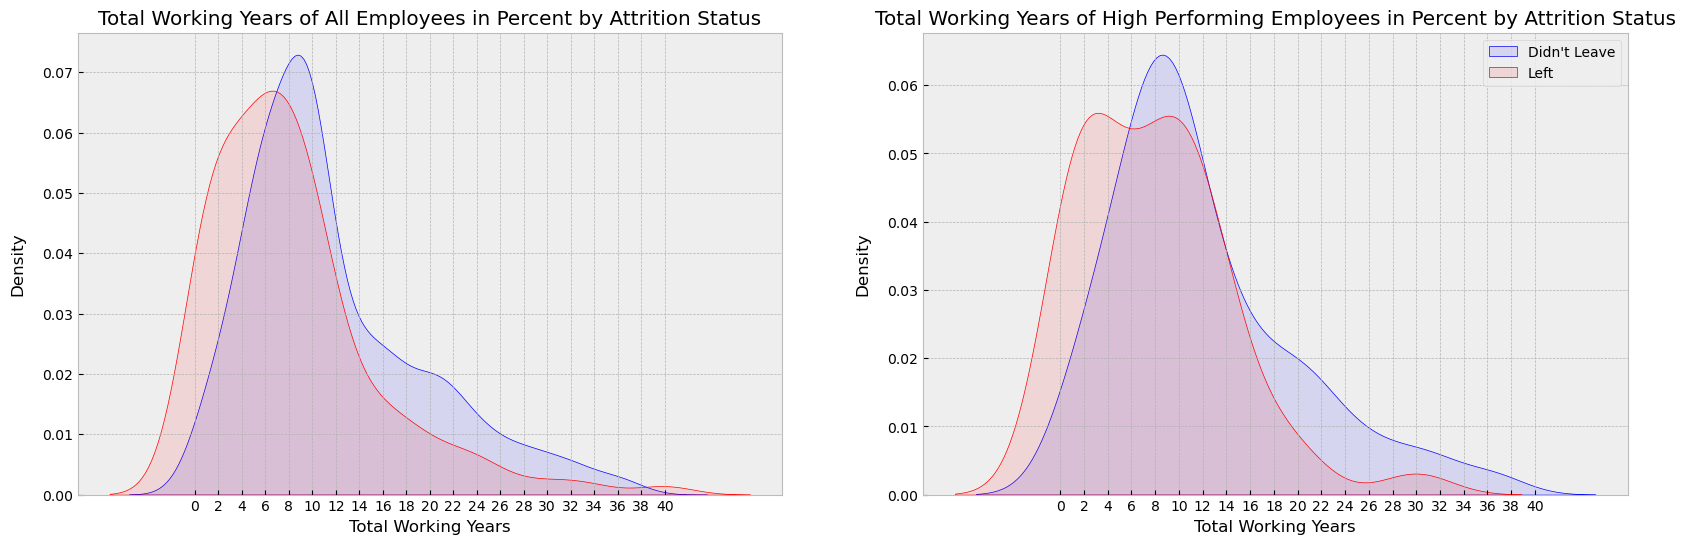

In [93]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.kdeplot(df.loc[df['Left'] == 0, 'TotalWorkingYears'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[0])
sns.kdeplot(df.loc[df['Left'] == 1, 'TotalWorkingYears'], fill=True, color='r', label="Left", alpha=.1, ax=ax[0])

sns.kdeplot(high_performers.loc[high_performers['Left'] == 0, 'TotalWorkingYears'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[1])
sns.kdeplot(high_performers.loc[high_performers['Left'] == 1, 'TotalWorkingYears'], fill=True, color='r', label="Left", alpha=.1, ax=ax[1])

plt.legend()
plt.setp(ax, xticks=range(0, 41, 2))
ax[0].set_xlabel('Total Working Years')
ax[1].set_xlabel('Total Working Years')
ax[0].set_ylabel('Density', labelpad=12)
ax[1].set_ylabel('Density', labelpad=12)

ax[0].set_title('Total Working Years of All Employees in Percent by Attrition Status')
ax[1].set_title('Total Working Years of High Performing Employees in Percent by Attrition Status')


fig.show()

### Years At Company

C:\Users\johnm\AppData\Local\Temp\ipykernel_26396\3564285031.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


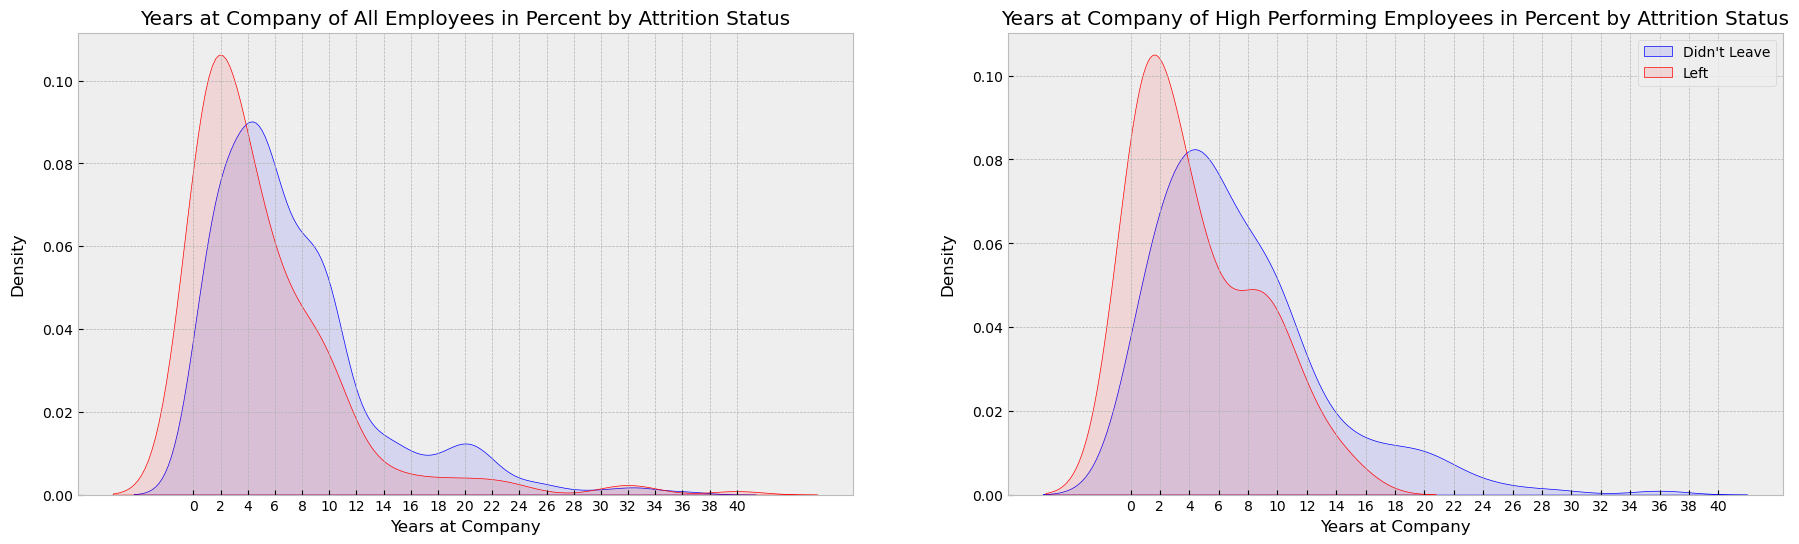

In [94]:
fig, ax = plt.subplots(1,2, figsize=(22,6))
sns.kdeplot(df.loc[df['Left'] == 0, 'YearsAtCompany'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[0])
sns.kdeplot(df.loc[df['Left'] == 1, 'YearsAtCompany'], fill=True, color='r', label="Left", alpha=.1, ax=ax[0])

sns.kdeplot(high_performers.loc[high_performers['Left'] == 0, 'YearsAtCompany'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[1])
sns.kdeplot(high_performers.loc[high_performers['Left'] == 1, 'YearsAtCompany'], fill=True, color='r', label="Left", alpha=.1, ax=ax[1])

plt.legend()
plt.setp(ax, xticks=range(0, 41, 2))
ax[0].set_xlabel('Years at Company')
ax[1].set_xlabel('Years at Company')
ax[0].set_ylabel('Density', labelpad=12)
ax[1].set_ylabel('Density', labelpad=12)

ax[0].set_title('Years at Company of All Employees in Percent by Attrition Status')
ax[1].set_title('Years at Company of High Performing Employees in Percent by Attrition Status')


fig.show()

In [95]:
leavers[leavers['YearsAtCompany'] == 2].describe()

,Age,NumCompaniesWorked,Over18,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
count,27.000000,27.000000,27.0,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.0
mean,30.111111,4.185185,1.0,0.481481,10.555556,40.0,2.592593,0.148148,14.629630,2.814815,5.370370,2.0,1.666667,1.0
std,7.170095,2.717989,0.0,0.509175,8.477723,0.0,1.047314,0.362014,2.705381,1.241495,3.520797,0.0,0.679366,0.0
min,20.000000,0.000000,1.0,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,2.000000,2.0,0.000000,1.0
25%,25.500000,1.000000,1.0,0.000000,3.000000,40.0,2.000000,0.000000,13.000000,2.000000,2.500000,2.0,2.000000,1.0
50%,29.000000,5.000000,1.0,0.000000,9.000000,40.0,3.000000,0.000000,14.000000,2.000000,5.000000,2.0,2.000000,1.0
75%,33.500000,6.000000,1.0,1.000000,15.000000,40.0,3.000000,0.000000,16.000000,4.000000,7.000000,2.0,2.000000,1.0
max,53.000000,9.000000,1.0,1.000000,29.000000,40.0,4.000000,1.000000,21.000000,5.000000,16.000000,2.0,2.000000,1.0


In [96]:
leavers[leavers['YearsAtCompany'] == 2].MonthlyIncome.value_counts()

low       14
medium    10
high       3
Name: MonthlyIncome, dtype: int64

### Num Companies Worked

C:\Users\johnm\AppData\Local\Temp\ipykernel_26396\1850302426.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


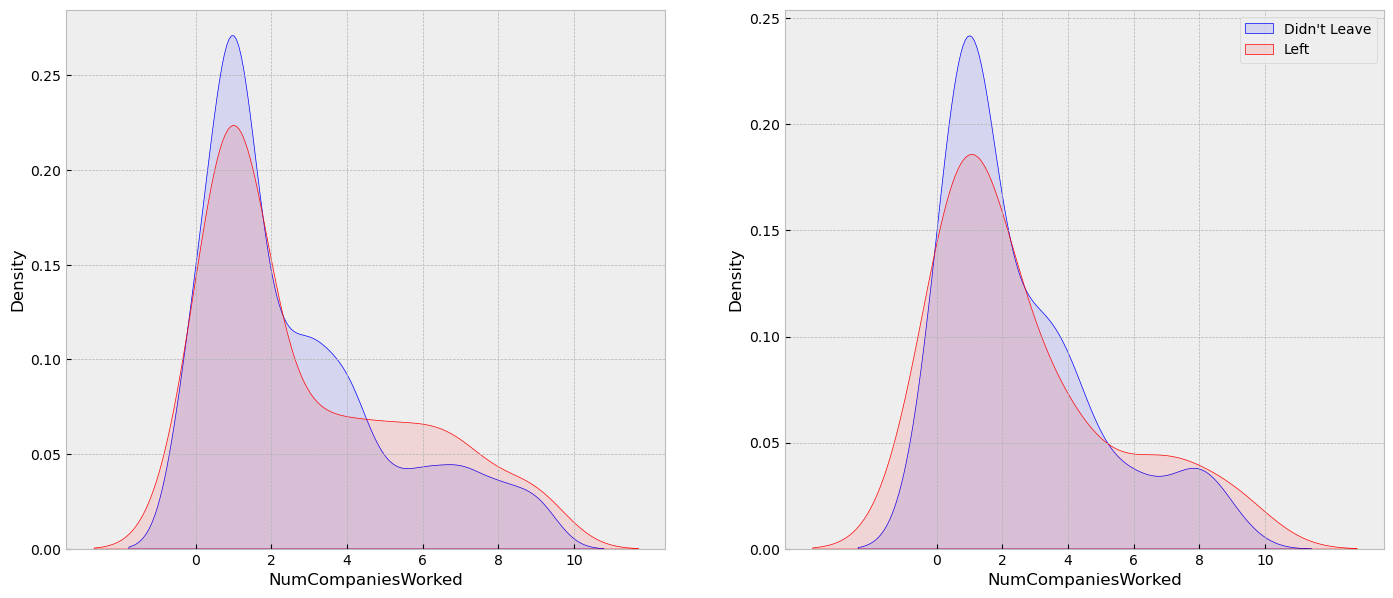

In [97]:
fig, ax = plt.subplots(1,2, figsize=(17,7))
sns.kdeplot(df.loc[df['Left'] == 0, 'NumCompaniesWorked'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[0])
sns.kdeplot(df.loc[df['Left'] == 1, 'NumCompaniesWorked'], fill=True, color='r', label="Left", alpha=.1, ax=ax[0])

sns.kdeplot(high_performers.loc[high_performers['Left'] == 0, 'NumCompaniesWorked'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[1])
sns.kdeplot(high_performers.loc[high_performers['Left'] == 1, 'NumCompaniesWorked'], fill=True, color='r', label="Left", alpha=.1, ax=ax[1])

plt.legend()
plt.setp(ax, xticks=range(0, 12, 2))


fig.show()

### Distance From Home

C:\Users\johnm\AppData\Local\Temp\ipykernel_26396\1408257432.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


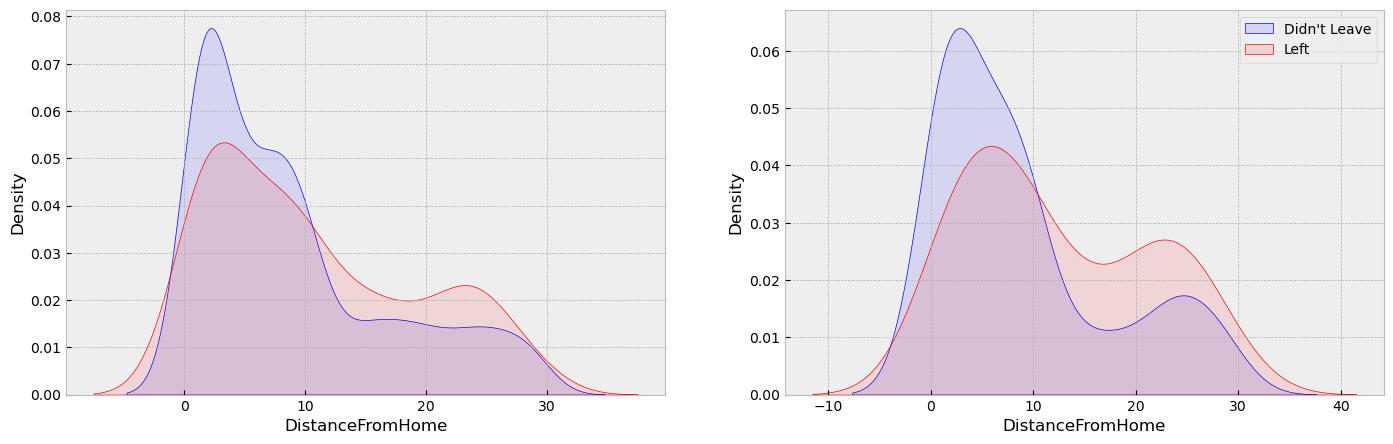

In [98]:
fig, ax = plt.subplots(1,2, figsize=(17,5))
sns.kdeplot(df.loc[df['Left'] == 0, 'DistanceFromHome'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[0])
sns.kdeplot(df.loc[df['Left'] == 1, 'DistanceFromHome'], fill=True, color='r', label="Left", alpha=.1, ax=ax[0])

sns.kdeplot(high_performers.loc[high_performers['Left'] == 0, 'DistanceFromHome'], fill=True, color='b', label="Didn't Leave", alpha=.1, ax=ax[1])
sns.kdeplot(high_performers.loc[high_performers['Left'] == 1, 'DistanceFromHome'], fill=True, color='r', label="Left", alpha=.1, ax=ax[1])

plt.legend()
# plt.setp(ax, xticks=range(0, 12, 2))

fig.show()

## Key Insights

- High performers were assumed to be employees with a performance rating of 5.
- 241 employees left the company out of 1474 employees (16 percent of employees left the company)
- 44 high performing employees left the company out of 262 high performers (17 percent of high performers left the company)
- Average age of leavers is 34 vs 38 for average age of current employees. These figures are the same for high performing leavers and current employees.

**Income** 
- Those on low income make up the highest proportion of leavers.Those on low income make up 53 percent of leavers. For high perfroming leavers, those on low income make up 57 percent.
- 67% of leavers in research and development

**Age**
- Employees between ages of 18 and 33 show a higher proportion of leavers compared to their counterparts
- For high performers, employees between ages of 18 and 26 show a higher proportion of leavers, but this remains more or less equal from ages of 26 to 35. Employees from the age of 35 show greater proportion of current employees than their counterparts.

**Total Working Years**
- Those who have working year total between 0 and 7 show higher proportion of leavers than their counterparts
- For high performers, those who have between 0 and 6 working years show higher proportion of leavers than their counterparts
- Leavers, on average, are earlier on in their career than current employees. Average total working years of leavers is around 8 years, whilst the average total working years of current employees is around 12 years.

**Years At Company**
- 11% leavers left at 2 years at the company.
- High performing employees more likely to leave if their total years at company is four years or under
- Average years at company for leavers overall is 5.2 years, for high performing leavers this figure is at 4.5 years.

**Number Companies Worked**
- Those employees who have worked 5 or more companies are more likely to leave

**Distance From Home**
- People who live further away from their work show higher proportion of leavers compared to their counterparts.


## Predictive Model

Here we will use machine learning to create a model to predict which employees are most at risk of leaving based on their characteristics as given in the dataset.

In [99]:
df.corr(method='pearson')['Left']

0
Age                       -0.152319
NumCompaniesWorked         0.045059
Over18                          NaN
workingfromhome            0.033013
DistanceFromHome           0.079313
StandardHours                   NaN
JobSatisfaction           -0.096931
complaintfiled            -0.032454
PercentSalaryHike         -0.016249
PerformanceRating         -0.013030
TotalWorkingYears         -0.166197
YearsAtCompany            -0.133152
YearsSinceLastPromotion   -0.030726
Left                       1.000000
Name: Left, dtype: float64

<AxesSubplot:xlabel='0', ylabel='0'>

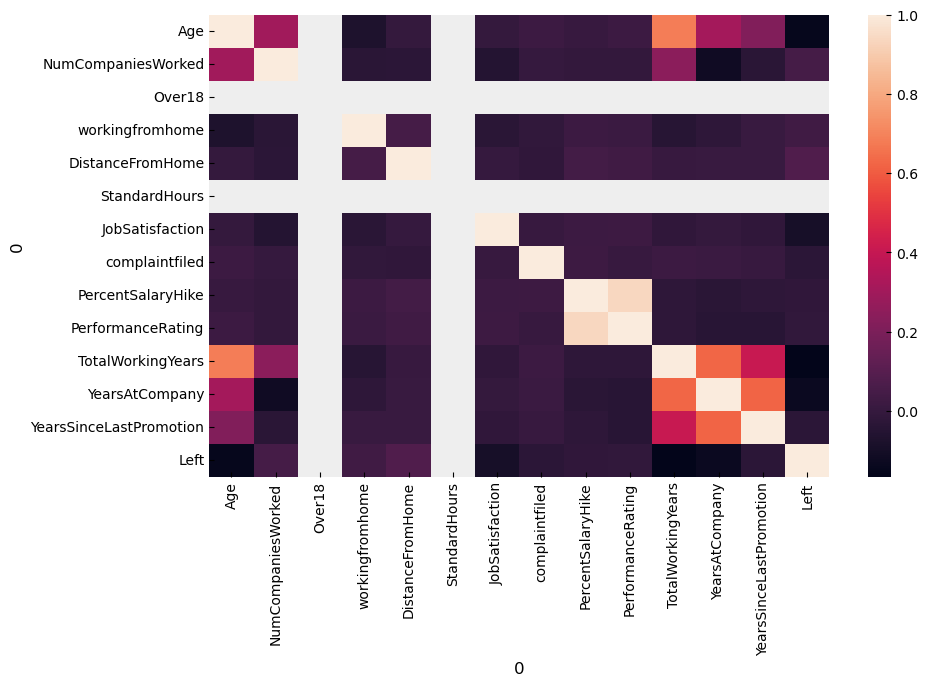

In [100]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr())

### Encoding

In [101]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 1 to 1474
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1474 non-null   int64 
 1   Gender                   1474 non-null   object
 2   MonthlyIncome            1474 non-null   object
 3   Department               1474 non-null   object
 4   NumCompaniesWorked       1474 non-null   int64 
 5   Over18                   1474 non-null   int64 
 6   workingfromhome          1474 non-null   int64 
 7   BusinessTravel           1474 non-null   object
 8   DistanceFromHome         1474 non-null   int64 
 9   StandardHours            1474 non-null   int64 
 10  JobSatisfaction          1474 non-null   int64 
 11  complaintfiled           1474 non-null   int64 
 12  complaintresolved        294 non-null    object
 13  complaintyears           263 non-null    object
 14  PercentSalaryHike        1474 non-null  

In [103]:
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


### Splitting Train and Test Data

In [104]:
# assign the target to a new dataframe and convert it to a numerical feature
target = df['Left'].copy()

In [105]:
# let's remove the target feature and redundant features from the dataset (if using whole df as feature)
df.drop(['Left', 'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (1474, 17)


In [106]:
from sklearn.model_selection import train_test_split

# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(\
#                                                     features,
                                                    df,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1031, 17)
Number transactions y_train dataset:  (1031,)
Number transactions X_test dataset:  (443, 17)
Number transactions y_test dataset:  (443,)


### Random Forest

Why Random Forest?
- Good at capturing non-linear relationships with the target variable (in this case we have weak linear correlations between 'left' and the other variables in the table).
- Random forests provide information on the importance of each feature in the model, making it easy to understand which features contribute to the prediction.

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [108]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [109]:
rf.score(X_train, y_train)

0.9757516973811833

In [110]:
pred = rf.predict(X_test)

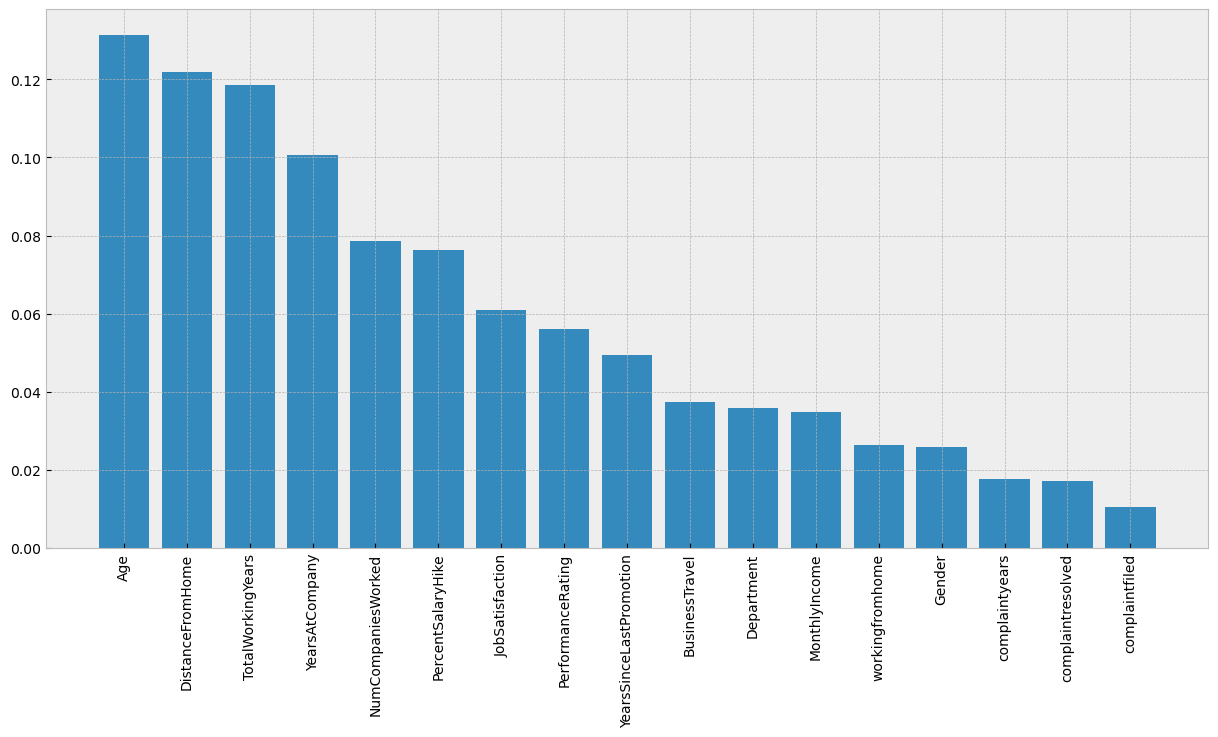

In [111]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
# plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test, pred)

0.8465011286681715

## Conclusion

What factors are most associated with employee leaving patterns?
- Majority of high performing leavers on 'low' income 
- Younger employees more likely to leave than older employees
- Employees who have been working at the company for 4 years or less are more likely to leave.
- Around 11% of leavers leave in their second year at the company
- Employees early on in their career (6 total working years or less are more likely to leave.

Can we predict which employees are most at risk of leaving based on their characteristics?
- Current model predicts employee leaving patterns with 84% accuracy.

Recommended actions
- Implement a strategic retention plan to organise HR and line manager meetings with medium to high risk employees to assess their working conditions, career goals, and how their issues can be resolved.